# Pre-requisites

#### Create an Anaconda environment:

    create -n <env_name> python=3.8

    conda install jupyter ipykernel numpy pandas matplotlib (part1 & part2)

    conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch (part 2)
    
The Hugging face library (needed for the second part of this lab)

    pip install gensim --user (part 1)
    
    pip install transformers (part 2)

    

!pip install gensim --user


# Word Embeddings

In [ ]:
import gensim.downloader as api
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Downloads approximately 1.6GB
wv = api.load('word2vec-google-news-300')

## Vocabulary and Word Vectors

In [ ]:
dir(wv)

NameError: ignored

In [ ]:
print(f"Vocabulary size (i.e. #words): { len(wv.vocab) }")

NameError: ignored

In [ ]:
# Inspecting some of those words
for i, word in enumerate(wv.vocab):
    if i == 20:
        break
    print(i, word)

0 </s>
1 in
2 for
3 that
4 is
5 on
6 ##
7 The
8 with
9 said
10 was
11 the
12 at
13 not
14 as
15 it
16 be
17 from
18 by
19 are


In [ ]:
vec_king = wv['king']
print(f"Word Embedding dimension: { vec_king.shape }.")
vec_king

Word Embedding dimension: (300,).


array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

## Words Similarity

In [ ]:
pairs = [
    ('car', 'vehicle'),   # a car is also a vehicle
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'vehicle'	0.78
'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#### Similarity - What is happening behind the hood?

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

w1, w2 = pairs[2]
embed_car = wv[w1]
embed_bicycle = wv[w2]

cos_sim = cosine_similarity(embed_car.reshape(1,-1), embed_bicycle.reshape(1,-1))
print('%r\t%r\t%.2f\t%.2f' % (w1, w2, wv.similarity(w1, w2), cos_sim))

'car'	'bicycle'	0.54	0.54


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
embed_car.reshape(1,-1).shape

(1, 300)

In [ ]:
print(wv.most_similar(positive=['not'], topn=5))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('do', 0.7125732898712158), ('did', 0.6864443421363831), ('anymore', 0.6689606308937073), ('necessarily', 0.6628232598304749), ('anything', 0.6583868265151978)]


## Word Analogies


In [ ]:
def analogy(x1, x2, y1):
    result = wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('japan', 'japanese', 'brazil')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'brazilian'

In [ ]:
analogy('queen', 'king', 'woman')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'man'

In [ ]:
analogy('good', 'fantastic', 'bad')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'horrible'

## Visualization

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
plt.style.use('seaborn-notebook')

In [ ]:
def display_pca_scatterplot(model, words, delta=1.5):

    word_vectors = np.array([model[w] for w in words])

    twodim = TSNE().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+delta, y+delta, word)
        
def display_closestwords(model, word, n=10):
    
    # get close words
    a = model.similar_by_word(word, topn=n)
    close_words = [w for (w,s) in a]
    close_words.append(word)
    display_pca_scatterplot(model, close_words)


In [ ]:
import random

# prepare a list of words to visualize
sample_words = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'spain', 'australia', 'Portugal', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute']

#sample_words = sample_words + random.choices(list(wv.vocab.keys()), k=10)

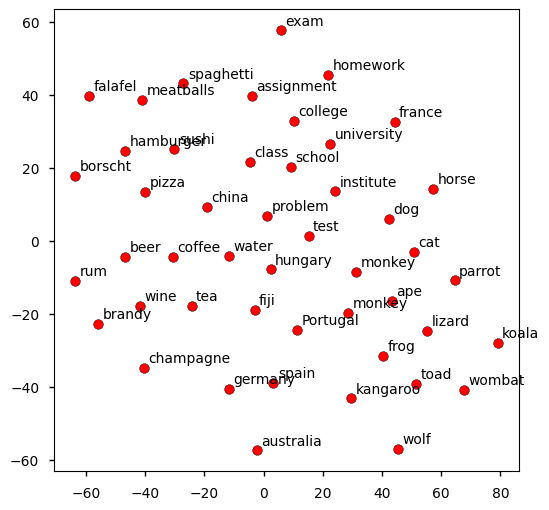

In [ ]:
display_pca_scatterplot(wv, sample_words)
plt.show()

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


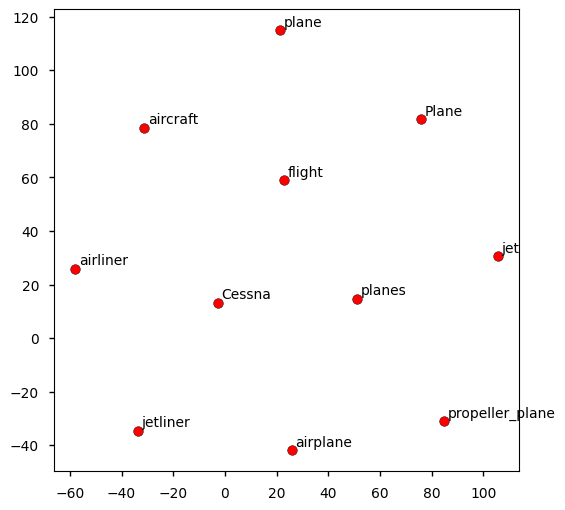

In [ ]:
a = display_closestwords(wv, 'plane', n=10)
plt.show()

## More

 - Try to play around with this demo visualization https://projector.tensorflow.org/
 
 - Word Embeddings for noisy text https://fasttext.cc/docs/en/english-vectors.html


 - Diachronic Word Embeddings https://nlp.stanford.edu/projects/histwords/


 - Sentence Embeddings https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html
